# Prediction of Outputs/ Sensitivity of GPEs to Inputs

First select the datatable to read in.

In [3]:
import pandas as pd

data = pd.read_table('LHC220_ExpDataTable.txt',delimiter=',')

In [4]:
data.head()

,Wind_Direction,Wind_Speed,Air_Density,BldPitch1,BldPitch2,BldPitch3,LSShftFxa,LSShftFya,LSShftFza,LSShftMxa,...,Blade2Region4,Blade2Region5,Blade2Region6,Blade3Region1,Blade3Region2,Blade3Region3,Blade3Region4,Blade3Region5,Blade3Region6,ErosionClass
0,11.897727,14.243182,1.187972,5.820897,5.820897,5.820897,603.372645,-1.480176,-3.451978,4180.139509,...,0.187500,0.111364,0.075000,0.107386,0.008523,0.412500,0.278409,0.470455,0.865909,light_moderate
1,9.238636,15.865909,1.192983,9.475813,9.475813,9.475813,525.595751,-10.190943,4.547302,4180.073270,...,0.055682,0.915909,0.625000,0.110795,0.065341,0.426136,0.394318,0.229545,0.547727,moderate
2,9.920455,5.743182,1.268710,0.000000,0.000000,0.000000,282.630901,-22.377370,-8.900686,689.634370,...,0.092045,0.697727,0.338636,0.158523,0.182386,0.382955,0.492045,0.956818,0.761364,light_moderate
3,5.965909,18.184091,1.244210,14.057100,14.057100,14.057100,454.267286,-1.667238,5.415940,4180.156382,...,0.492045,0.034091,0.193182,0.240341,0.101705,0.226136,0.023864,0.147727,0.465909,light
4,0.579545,18.415909,1.230290,0.000000,0.000000,0.000000,971.123981,13.969798,-22.057260,3683.609280,...,0.112500,0.220455,0.334091,0.055114,0.133523,0.487500,0.071591,0.506818,0.765909,moderate


In [5]:
column_names = data.columns

In [39]:
print(column_names[0:3])
print(column_names[615:633])
print(column_names[40])

Index(['Wind_Direction', 'Wind_Speed', 'Air_Density'], dtype='object')
Index(['Blade1Region1', 'Blade1Region2', 'Blade1Region3', 'Blade1Region4',
       'Blade1Region5', 'Blade1Region6', 'Blade2Region1', 'Blade2Region2',
       'Blade2Region3', 'Blade2Region4', 'Blade2Region5', 'Blade2Region6',
       'Blade3Region1', 'Blade3Region2', 'Blade3Region3', 'Blade3Region4',
       'Blade3Region5', 'Blade3Region6'],
      dtype='object')
TipDyc2


In [19]:
import numpy as np
from psimpy.emulator import ScalarGaSP
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [46]:
# Turn the datatable into and array
bigarray = data.to_numpy()

# Select the number of the output we want to predict
num = 40
outputs = bigarray[:,num]
# manually set the ID
ID = 3;

# Select the inputs we want to use
selected_ins = np.array([0,1,2,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632])
#selected_ins = np.array([0,1,2,620,626,632])
#selected_ins = np.array([0,1,2])
            
inputs = bigarray[:,selected_ins[:]]

num_in = len(inputs[0,:])

# We will scale the inputs before trying to predict the outputs for best results;
# But in order to avoid data leaks, first we will split the data, then scale the training data
X_train, X_test, y_train, y_test = train_test_split(inputs, outputs, test_size=0.1)
scaler = StandardScaler()
scaler.fit(X_train)

X_train_sc = scaler.transform(X_train) # Transform the training data
X_test_sc = scaler.transform(X_test) # Use the transformer fit on training data for testing

# Now that the data is scaled, we can proceed to try to fit a GPE
# We will evaluate it on a scatter diagram, a QuantileQuantile plot, 
# and calculate the RMSE and the correlation coefficient

# Select the model
emulator = ScalarGaSP(ndim=len(inputs[0,:]),num_initial_values=2)

# Fit the model
emulator.train(design=X_train_sc, response=y_train)

The upper bounds of the range parameters are 7982.792 8114.562 8134.084 8083.185 8063.187 8071.675 8291.079 8168.987 8051.349 8072.407 8167.447 8087.486 7969.927 8069.66 8058.968 8092.106 8084.711 8005.931 8219.221 8116.778 8153.51 
The initial values of range parameters are 159.6558 162.2912 162.6817 161.6637 161.2637 161.4335 165.8216 163.3797 161.027 161.4481 163.3489 161.7497 159.3985 161.3932 161.1794 161.8421 161.6942 160.1186 164.3844 162.3356 163.0702 
Start of the optimization  1  : 
The number of iterations is  64 
 The value of the  marginal posterior  function is  102.5916 
 Optimized range parameters are 416.9061 1.415834 7.058603 443.8281 445.2588 8071.675 8291.079 22.01762 77.23736 8072.407 269.0185 1545.313 892.1845 133.4356 24.84951 369.204 8084.711 93.06302 119.8829 15.26657 232.4089 
 Optimized nugget parameter is 0 
 Convergence:  TRUE 
The initial values of range parameters are 86.11273 87.53417 87.74476 87.1957 86.97997 87.07153 89.43831 88.12126 86.85227 87.07944

RMSE training: 1.2072870161191568e-08
RMSE testing: 0.05811654880725542
Correlation Coefficient training: 0.9999999999999963
Correlation Coefficient testing: 0.9442097810499133


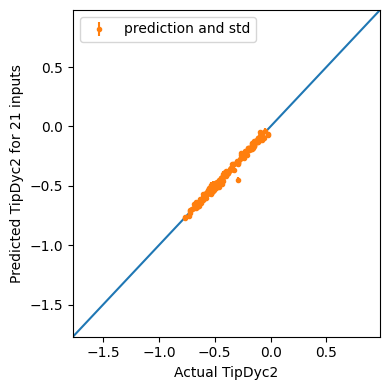

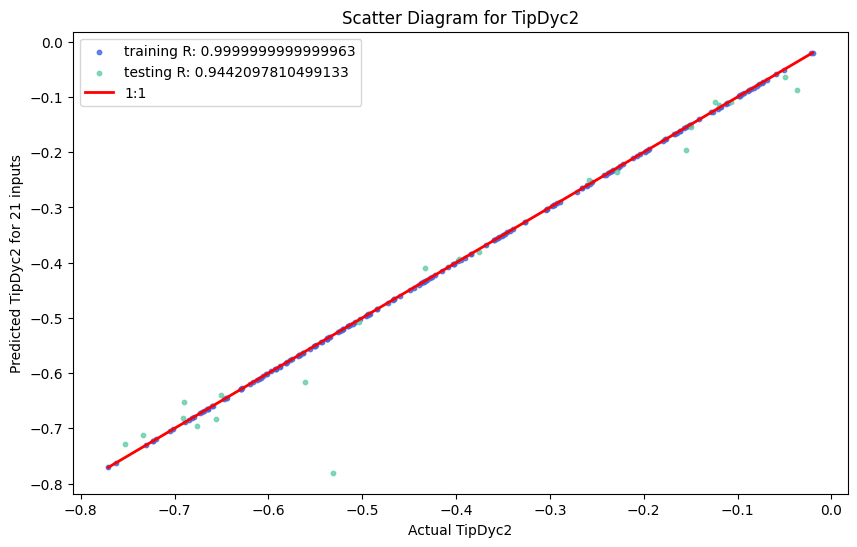

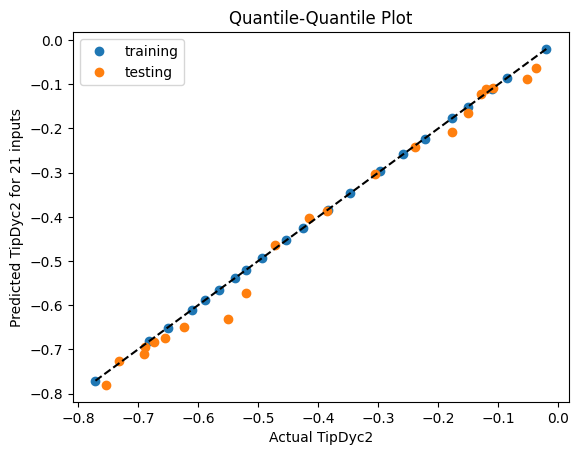

<Figure size 640x480 with 0 Axes>

In [47]:
# Once the model is fit, run the various validation plot codes
text1 = [
    'Included the following variables:',
    'ID = '
]
IDsav = 'GPEdescp'+str(num_in)+name+str(ID)+'.txt'
iter = 0
with open(IDsav,'w') as f:
                  for line in text1:
                      f.write(line)
                      if iter == 0:
                          f.write(str(selected_ins))
                      if iter == 1:
                          f.write(str(ID))
                      iter = iter + 1
                      f.write('\n')
f.close()    

name = column_names[num]

# Validate the model
validation = emulator.loo_validate()

# Plot the validation
fig , ax = plt.subplots(figsize=(4,4))
y = y_train # for now y is made to be the training set
xaxtext = "Actual "+name
yaxtext = "Predicted "+name+" for " + str(num_in) + " inputs"
ax.set_xlabel(xaxtext)
ax.set_ylabel(yaxtext)
ax.set_xlim(np.min(y)-1,np.max(y)+1)
ax.set_ylim(np.min(y)-1,np.max(y)+1)

_ = ax.plot([np.min(y)-1,np.max(y)+1], [np.min(y)-1,np.max(y)+1])
_ = ax.errorbar(y, validation[:,0], validation[:,1], fmt='.', linestyle='', label='prediction and std')
_ = plt.legend()
plt.tight_layout()
sav1txt = "validation"+str(num_in)+name+str(ID)+".png"
plt.savefig(sav1txt)


predicted_train = emulator.predict(X_train_sc)
predicted_test = emulator.predict(X_test_sc)

predict_train = predicted_train[:,0]
predict_test = predicted_test[:,0]

# Calculate R factor and mean-square-error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

error_training = np.sqrt(mean_squared_error(predict_train,y_train))
error_test = np.sqrt(mean_squared_error(predict_test,y_test))

corr_coef_train = r2_score(predict_train,y_train)
corr_coef_test = r2_score(predict_test,y_test)

print('RMSE training:',error_training)
print('RMSE testing:', error_test)
print('Correlation Coefficient training:',corr_coef_train)
print('Correlation Coefficient testing:', corr_coef_test)

# Plot the Results
l1 = "training R: "+str(corr_coef_train)
l2 = "testing R: "+str(corr_coef_test)
fig, ax = plt.subplots(1,1,figsize=(10, 6))
ax.scatter(predict_train, y_train, color="royalblue", label=l1, s=10,alpha = 0.8)
ax.scatter(predict_test, y_test, color="mediumaquamarine", label=l2, s=10,alpha = 0.8)
ax.plot([y_train.min(),y_train.max()],[y_train.min(),y_train.max()],color = "red", label = "1:1", linewidth=2)
ax.set_xlabel(xaxtext)
ax.set_ylabel(yaxtext)
ttl = "Scatter Diagram for "+name
ax.set_title(ttl)
ax.legend()
plt.show()
sav2txt = "scatterdiag"+str(num_in)+name+str(ID)+".png"
plt.savefig(sav2txt)
a = predict_train
b = y_train

c = predict_test
d = y_test

percs = np.linspace(0,100,21)
qn_a = np.percentile(a, percs)
qn_b = np.percentile(b, percs)
qn_c = np.percentile(c, percs)
qn_d = np.percentile(d, percs)

plt.plot(qn_a,qn_b, ls="", marker="o",label = "training")
plt.plot(qn_c,qn_d, ls="", marker="o",label = "testing")

x = np.linspace(np.min((qn_a.min(),qn_b.min())), np.max((qn_a.max(),qn_b.max())))
plt.plot(x,x, color="k", ls="--")
plt.title("Quantile-Quantile Plot")
plt.xlabel(xaxtext)
plt.ylabel(yaxtext)
plt.legend()
plt.show()
sav3txt = "QQ"+str(num_in)+name+str(ID)+".png"
plt.savefig(sav3txt)